In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [2]:
#import csv of premier league defensive stats from fbref. I have uploaded the data but I changed the column names in the csv prior.
df = pd.read_csv('/Users/timi/Desktop/ALL bundesliga stats for pizza plot - sportsref_download (5) (1).csv')

#when you first read in the csv from fbref, you'll notice the player names are kind of weird. This code splits them on the \
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [3]:
df

,Player,Nation,Pos,Squad,Age,Born,90s,Touches Att 3rd,Touches Att Pen box,Dribbles Attempted,...,Carries into the 1/3,SCA90,GCA90,Goals,Expected goals (xG),Non penalty Expected Goals (npxG),Progressive Distance,Assist,xA,Key passes
0,Issah Abbas,gh GHA,"DF,FW",Mainz 05,21,1998,0.2,8,1,2,...,1,0.00,0.00,0,0.0,0.0,106,0,0.0,0
1,David Abraham,ar ARG,DF,Eint Frankfurt,34,1986,13.6,100,8,6,...,9,0.15,0.00,1,0.7,0.7,4254,0,0.5,2
2,Amir Abrashi,al ALB,MF,Freiburg,30,1990,0.7,7,0,0,...,0,0.00,0.00,0,0.0,0.0,27,0,0.0,0
3,Ragnar Ache,de GER,"FW,DF",Eint Frankfurt,22,1998,1.1,24,11,0,...,2,0.00,0.00,1,0.3,0.3,29,0,0.0,0
4,Tyler Adams,us USA,"DF,MF",RB Leipzig,21,1999,20.6,372,20,21,...,34,1.31,0.15,1,0.9,0.9,5363,1,0.9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Deyovaisio Zeefuik,nl NED,"DF,MF",Hertha BSC,22,1998,10.1,187,26,32,...,18,2.69,0.00,1,0.0,0.0,2299,0,1.7,14
501,Robin Zentner,de GER,GK,Mainz 05,25,1994,31.0,4,1,1,...,0,0.13,0.00,0,0.1,0.1,13230,0,0.3,1
502,Ron-Robert Zieler,de GER,GK,Köln,31,1989,0.6,0,0,0,...,0,0.00,0.00,0,0.0,0.0,390,0,0.0,0
503,Joshua Zirkzee,nl NED,FW,Bayern Munich,19,2001,1.0,23,5,0,...,0,1.96,0.00,0,0.4,0.4,15,0,0.2,1


In [4]:
 # only defenders and only those with more than 12 90's played 
#(This data is from about week 35 so 12 90s will help us eliminate most outliers)
df_mf_fw =df.loc[(df['Pos']=='MF,FW') & (df['90s']>13)]
df_fw = df.loc[(df['Pos']=='FW') & (df['90s']>13)]
df_fw_mf = df.loc[(df['Pos']=='FW,MF') & (df['90s']>13)]

In [5]:
df_join = [df_mf_fw,df_fw,df_fw_mf]

In [6]:
#merging all the midfield and forward dataframe
df1 = pd.concat(df_join)

In [7]:
df1.reset_index()

,index,Player,Nation,Pos,Squad,Age,Born,90s,Touches Att 3rd,Touches Att Pen box,...,Carries into the 1/3,SCA90,GCA90,Goals,Expected goals (xG),Non penalty Expected Goals (npxG),Progressive Distance,Assist,xA,Key passes
0,35,Christoph Baumgartner,at AUT,"MF,FW",Hoffenheim,20,1999,26.3,531,107,...,55,3.00,0.42,6,5.5,5.5,3234,3,3.0,32
1,55,Leonardo Bittencourt,de GER,"MF,FW",Werder Bremen,26,1993,16.8,347,49,...,32,2.68,0.24,4,4.4,3.7,1919,1,1.3,20
2,57,Jean-Paul Boëtius,nl NED,"MF,FW",Mainz 05,26,1994,22.9,393,56,...,23,2.62,0.31,2,2.8,2.8,3175,4,6.0,32
3,78,Daniel Caligiuri,it ITA,"MF,FW",Augsburg,32,1988,29.6,574,47,...,56,2.94,0.30,6,4.8,2.6,6675,4,3.7,48
4,81,Gonzalo Castro,de GER,"MF,FW",Stuttgart,33,1987,19.2,466,47,...,43,4.01,0.26,4,3.3,3.3,4097,2,3.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,406,Leroy Sané,de GER,"FW,MF",Bayern Munich,24,1996,20.1,690,131,...,40,4.29,1.05,6,5.6,5.6,2405,9,6.4,36
67,410,Josh Sargent,us USA,"FW,MF",Werder Bremen,20,2000,27.8,358,95,...,18,2.30,0.14,5,5.2,5.2,1384,2,3.8,30
68,418,Romano Schmid,at AUT,"FW,MF",Werder Bremen,20,2000,13.1,235,15,...,24,2.37,0.54,0,0.6,0.6,1813,3,1.0,13
69,444,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,28,1991,17.4,335,54,...,35,2.82,0.46,5,4.3,4.3,2196,4,2.5,19


In [8]:
#dropping the columns i won't be using
df1 = df1.drop(['Nation','Pos','Squad','Age','Born'],axis=1)

In [9]:
#chnaging some of the column names
column_names = ['Player', '90s', ' Touches Att 3rd', 'Touches Att Pen box',
       'Dribbles Attempted', 'Dribbles Succ%', 'Carries into att 3rd', 'SCA90',
       'GCA90', 'Goals', 'xG',
       ' npxG', 'Progressive Distance', 'Assist',
       'xA', 'Key passes']
df1.columns = column_names

In [10]:
#Create a parameter list
params = list(df1.columns)
params

['Player',
 '90s',
 ' Touches Att 3rd',
 'Touches Att Pen box',
 'Dribbles Attempted',
 'Dribbles Succ%',
 'Carries into att 3rd',
 'SCA90',
 'GCA90',
 'Goals',
 'xG',
 ' npxG',
 'Progressive Distance',
 'Assist',
 'xA',
 'Key passes']

In [11]:
#drop the first 3 list item becuase we will not be using player,index, or 90s as a comparison metric
params = params[2:]
params

[' Touches Att 3rd',
 'Touches Att Pen box',
 'Dribbles Attempted',
 'Dribbles Succ%',
 'Carries into att 3rd',
 'SCA90',
 'GCA90',
 'Goals',
 'xG',
 ' npxG',
 'Progressive Distance',
 'Assist',
 'xA',
 'Key passes']

In [12]:
#Getting the data values just for jadon sancho
player = df1.loc[df1['Player']=='Jadon Sancho'].reset_index()
player = list(player.loc[0])
print(player)

[405, 'Jadon Sancho', 22.9, 1064, 134, 163, 55.8, 81, 5.46, 0.96, 8, 7.4, 6.6, 5317, 11, 6.8, 67]


In [13]:
df1.Player.values

array(['Christoph Baumgartner', 'Leonardo Bittencourt',
       'Jean-Paul Boëtius', 'Daniel Caligiuri', 'Gonzalo Castro',
       'Ritsu Doan', 'Dominick Drexler', 'Yannick Gerhardt',
       'Vincenzo Grifo', 'Amine Harit', 'Marcus Ingvartsen',
       'Daichi Kamada', 'Dani Olmo', 'Marco Reus', 'Elvis Rexhbeçaj',
       'Roland Sallai', 'Lars Stindl', 'Ruben Vargas', 'Hannes Wolf',
       'Amin Younes', 'Lucas Alario', 'Taiwo Awoniyi', 'Ihlas Bebou',
       'Josip Brekalo', 'Jhon Córdoba', 'Ermedin Demirović',
       'Erling Haaland', 'Matthew Hoppe', 'Sasa Kalajdzic', 'Fabian Klos',
       'Robert Lewandowski', 'Florian Niederlechner', 'Karim Onisiwo',
       'Nils Petersen', 'Krzysztof Piątek', 'Alassane Pléa',
       'Yussuf Poulsen', 'Patrik Schick', 'André Silva',
       'Alexander Sørloth', 'Marcus Thuram', 'Wout Weghorst',
       'Leon Bailey', 'Julian Brandt', 'Kingsley Coman', 'Matheus Cunha',
       'Moussa Diaby', 'Ondrej Duda', 'Breel Embolo', 'Emil Forsberg',
       'Philip

In [14]:
#making dure both the player length and parameter length are the same
print(len(player),print(len(params)))
player = player[3:]
print(len(player),print(len(params)))

14
17 None
14
14 None


In [15]:
player

[1064, 134, 163, 55.8, 81, 5.46, 0.96, 8, 7.4, 6.6, 5317, 11, 6.8, 67]

In [16]:
# now that we have the player scores, we need to calculate the percentile values with scipy stats.
# I am doing this because I do not know the percentile beforehand and only have the raw numbers
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df1[params[x]],player[x])))

In [17]:
round(stats.percentileofscore(df[params[0]],player[0]))

100

In [18]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

In [34]:
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    background_color = '#222222',
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color = '#676767',
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

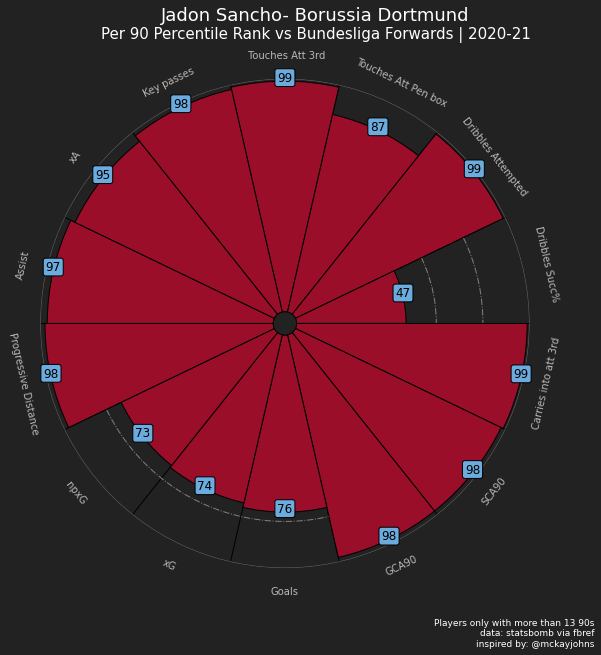

In [51]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(9,9),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#9a0e2a", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#d3d3d3", fontsize=10,
        va="center", alpha=.85
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#6CABDD",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.56, 0.97, "Jadon Sancho- Borussia Dortmund", size=18,
    ha="center", color="white"
)

# add subtitle
fig.text(
    0.56, 0.942,
    "Per 90 Percentile Rank vs Bundesliga Forwards | 2020-21",
    size=15,
    ha="center", color="white"
)

# add credits
notes = 'Players only with more than 13 90s'
CREDIT_1 = "data: statsbomb via fbref"
CREDIT_2 = "inspired by: @mckayjohns"

fig.text(
    0.99, 0.005, f"{notes}\n{CREDIT_1}\n{CREDIT_2}", size=9,
    color="white",
    ha="right"
)

plt.savefig('jadon sancho pizza plot.png',dpi=500,bbox_inches = 'tight')